<center><img src='./Figs/cs-logo.png' width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center> Mention IA - Reinforcement Learning - Task 1</center>
<hr style=" border:none; height:3px;">
</h1>

### Presenté par

- **Rebecca Bayssari**  
  📧 rebecca.bayssari@student-cs.fr  

### Installation and Setup

In [3]:
! pip install  imageio


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! pip install gymnasium
! pip install highway-env


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Environment Initialization and Configuration

We begin by importing essential libraries for deep learning and reinforcement learning

In [5]:
%matplotlib inline

import gymnasium as gym
from matplotlib import pyplot as plt
import pprint
import pickle
import highway_env  
from copy import deepcopy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
from IPython.display import clear_output
import time

Next, we load a custom configuration file (config.pkl) and apply it to initialize the Highway-Fast-v0 environment.This configuration defines important simulation parameters such as the observation type, number of lanes, vehicle behavior, and reward structure allowing us to customize the driving scenario before training the agent.

In [6]:
# Loading the pkl configuration file
with open("config.pkl", "rb") as f:
    config = pickle.load(f)

# Creation of the environment 
env = gym.make("highway-fast-v0", render_mode="rgb_array")
env.unwrapped.configure(config)
obs = env.reset()
print("Initial Observation:", obs)

Initial Observation: (array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  1.        ,  0.        ,  0.     

### Interacting with the Environment

To explore the highway-fast-v0 environment, we manually take a few actions and visualize the rendered frames. We then step through the environment using the "IDLE" action and display the result.

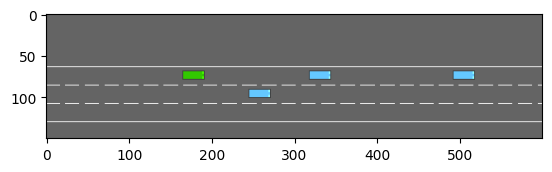

In [7]:
env = gym.make('highway-fast-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "observation": {"type": "Kinematics"},
    "action": {"type": "DiscreteMetaAction"}
})
env.reset()

for _ in range(3):
    action = env.unwrapped.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

We also try sampling random actions from the environment’s action space to observe how the vehicle responds.

In [8]:
obs, info = env.reset()
obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
env.render()

array([[[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]]

Finally, we print useful information such as the observation, reward, termination status, and additional environment metadata.

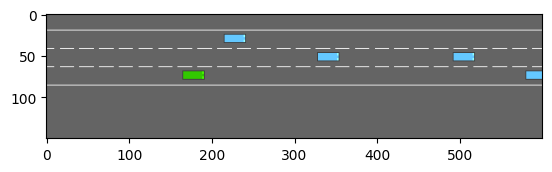

Observation : [[ 1.          1.          0.6666667   0.37391615  0.        ]
 [ 1.          0.04475354 -0.6666667  -0.10018331  0.        ]
 [ 1.          0.14772533 -0.33333334 -0.15993886  0.        ]
 [ 1.          0.2972107  -0.33333334 -0.10320252  0.        ]
 [ 1.          0.37702075  0.         -0.19241084  0.        ]]
Reward : 0.9976877960112223
Terminated : False
info : {'speed': 29.913292350420836, 'crashed': False, 'action': 2, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 1.0, 'high_speed_reward': 0.9913292350420836, 'on_road_reward': 1.0}}


In [9]:
obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
plt.imshow(env.render())
plt.show()
print("Observation : {}".format(obs))
print("Reward : {}".format(reward))

print("Terminated : {}".format(terminated))
print("info : {}".format(info))

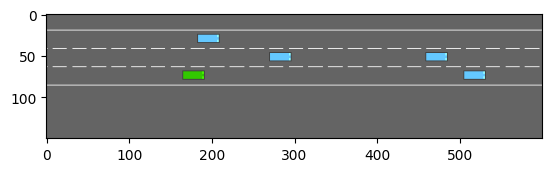

Observation : [[ 1.          1.          0.6666667   0.32058772  0.        ]
 [ 1.          0.01601295 -0.6666667  -0.04940082  0.        ]
 [ 1.          0.09532988 -0.33333334 -0.1066784   0.        ]
 [ 1.          0.26718804 -0.33333334 -0.05623446  0.        ]
 [ 1.          0.3088244   0.         -0.15512328  0.        ]]
Reward : 0.8839204779383776
Terminated : False
info : {'speed': 25.647017922689162, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 1.0, 'high_speed_reward': 0.5647017922689163, 'on_road_reward': 1.0}}


In [10]:
obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
plt.imshow(env.render())
plt.show()
print("Observation : {}".format(obs))
print("Reward : {}".format(reward))

print("Terminated : {}".format(terminated))
print("info : {}".format(info))

### Exploring the Action and Observation Spaces

To better understand the environment, we inspect its configuration, action space, and observation space.

In [11]:
import pprint
pprint.pprint(env.unwrapped.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 30,
 'ego_spacing': 1.5,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 3,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 5,
 'vehicles_count': 20,
 'vehicles_density': 1}


We check if the action space is discrete or continuous and retrieve useful attributes accordingly. The same logic applies to the observation space.

In [12]:
# Actions
print("Action Space:", env.action_space)
print("Action Space Type:", type(env.action_space))
if isinstance(env.action_space, gym.spaces.Discrete):
    print("Number of Actions:", env.action_space.n)
elif isinstance(env.action_space, gym.spaces.Box):
    print("Action Bounds:", env.action_space.low, env.action_space.high)

# States
print("\nObservation Space:", env.observation_space)
print("Observation Space Type:", type(env.observation_space))
if isinstance(env.observation_space, gym.spaces.Discrete):
    print("Number of States:", env.observation_space.n)
elif isinstance(env.observation_space, gym.spaces.Box):
    print("State Bounds:", env.observation_space.low, env.observation_space.high)

# Adjusting for continuous action space
if isinstance(env.action_space, gym.spaces.Box):
    print("\nAction Space is continuous.")
    print("Action Dimensionality:", env.action_space.shape[0])


Action Space: Discrete(5)
Action Space Type: <class 'gymnasium.spaces.discrete.Discrete'>
Number of Actions: 5

Observation Space: Box(-inf, inf, (5, 5), float32)
Observation Space Type: <class 'gymnasium.spaces.box.Box'>
State Bounds: [[-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]] [[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]


In [13]:
pprint.pprint(env.unwrapped.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 30,
 'ego_spacing': 1.5,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 3,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 5,
 'vehicles_count': 20,
 'vehicles_density': 1}


### Manually Driving the Agent

We then test how the agent behaves when we manually provide a series of actions such as "FASTER" and "LANE_LEFT". At each step, we render the environment to visualize the vehicle’s position and behavior.If the episode ends early due to a collision or completion, the environment is reset. This interactive phase helps us confirm that the environment behaves as expected before implementing a learning agent.

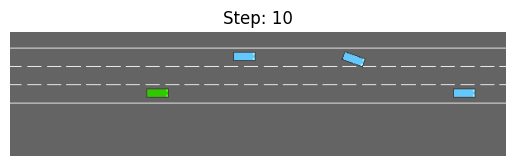

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Reset the environment
observation, _ = env.reset()

actions = [
    env.unwrapped.action_type.actions_indexes["IDLE"],
    env.unwrapped.action_type.actions_indexes["FASTER"],
    env.unwrapped.action_type.actions_indexes["LANE_LEFT"],
    env.unwrapped.action_type.actions_indexes["LANE_RIGHT"],
    env.unwrapped.action_type.actions_indexes["IDLE"],
] * 2  # 10 steps total

lista = []

for step in range(10):
    action = actions[step % len(actions)]
    observation, reward, terminated, truncated, info = env.step(action)
    lista.append(observation)

    # Affichage
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.title(f"Step: {step + 1}")
    plt.axis("off")
    plt.show()

    if terminated or truncated:
        print("Episode ended after this step. Resetting environment.")
        observation, _ = env.reset()

# Fermer l'environnement
env.close()


### DQN Agent in Highway-fast-v0 Environment

We begin by setting up the environment using a pre-saved configuration file (config.pkl). This configuration sets the observation space to OccupancyGrid and uses DiscreteMetaAction for control. We implement a RandomAgent to act randomly and establish a performance baseline. It helps confirm that our environment is working and sets a benchmark for training later. We evaluate the random agent with visual rendering and reward aggregation.

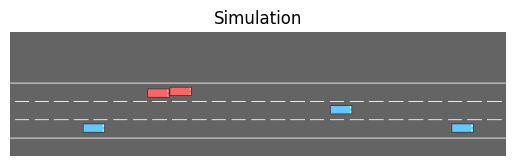

Episode total reward: 4.11215440666686
Average over 5 runs : 6.366447906660378


In [15]:
# Définir un agent aléatoire
class RandomAgent:
    def __init__(self, observation_space, action_space):
        self.action_space = action_space
        
    def get_action(self, state):
        return self.action_space.sample()
    
    def update(self, *data):
        pass

agent = RandomAgent(env.observation_space, env.action_space)

# Fonction d'évaluation sur plusieurs épisodes
def eval_agent(agent, env, n_sim=5):
    env_copy = deepcopy(env)
    episode_rewards = np.zeros(n_sim)
    for i in range(n_sim):
        state, _ = env_copy.reset()
        reward_sum = 0
        done = False
        while not done: 
            action = agent.get_action(state)
            state, reward, terminated, truncated, _ = env_copy.step(action)
            reward_sum += reward
            done = terminated or truncated
        episode_rewards[i] = reward_sum
    return episode_rewards

# Exécution d'un seul épisode avec affichage
def run_one_episode(env, agent, display=True):        
    display_env = deepcopy(env)        
    done = False  
    state, _ = display_env.reset()        
    rewards = 0        

    while not done:        
        action = agent.get_action(state)        
        state, reward, terminated, truncated, _ = display_env.step(action)    
        rewards += reward        
        done = terminated or truncated
        
        if display:         
            clear_output(wait=True)        
            plt.imshow(display_env.render())        
            plt.axis("off")
            plt.title("Simulation")
            plt.show()        
            
    if display:        
        display_env.close()        
    print(f'Episode total reward: {rewards}')        

# Lancer un épisode
run_one_episode(env, agent, display=True)

# Évaluer sur 5 épisodes
print(f'Average over 5 runs : {np.mean(eval_agent(agent, env))}') 

We implement our own Deep Q-Network (DQN) agent using PyTorch. The agent uses:

    1-A ReplayBuffer for stable learning

    2-An epsilon-greedy exploration policy

    3-A target network updated every few steps

We set key hyperparameters:

    gamma = 0.99

    batch_size = 64

    buffer_capacity = 10,000

    epsilon decay

    update_target_every = 512

Then train over 1200 episodes

In [16]:
# Définir le replay buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.index = 0

    def push(self, *args):
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.index] = args
        self.index = (self.index + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Réseau de neurones
class Net(nn.Module):
    def __init__(self, obs_size, hidden_size1, hidden_size2, n_actions):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, n_actions)
        )

    def forward(self, x):
        return self.net(x)

# Agent DQN
class DQN:
    def __init__(self, action_space, observation_space, gamma, batch_size, buffer_capacity,
                 update_target_every, epsilon_start, decrease_epsilon_factor, epsilon_min, learning_rate):
        
        self.action_space = action_space
        self.observation_space = observation_space
        self.gamma = gamma
        self.batch_size = batch_size
        self.buffer_capacity = buffer_capacity
        self.update_target_every = update_target_every
        self.epsilon_start = epsilon_start
        self.decrease_epsilon_factor = decrease_epsilon_factor
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.reset()

    def reset(self):
        hidden_size = 128
        obs_shape = self.observation_space.shape
        obs_size = np.prod(obs_shape)  # e.g. (5, 5, 7) => 175
        n_actions = self.action_space.n
        self.buffer = ReplayBuffer(self.buffer_capacity)
        self.q_net = Net(obs_size, hidden_size, hidden_size, n_actions)
        self.target_net = Net(obs_size, hidden_size, hidden_size, n_actions)
        self.target_net.load_state_dict(self.q_net.state_dict())
        self.loss_function = nn.MSELoss()
        self.optimizer = optim.Adam(self.q_net.parameters(), lr=self.learning_rate)
        self.epsilon = self.epsilon_start
        self.n_steps = 0
        self.n_eps = 0

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.action_space.sample()
        return self.get_best_action(state)

    def get_best_action(self, state):
        state = torch.tensor(state).float().flatten().unsqueeze(0)
        q_values = self.q_net(state)
        return torch.argmax(q_values).item()

    def update(self, state, action, reward, terminated, next_state):
        state_tensor = torch.tensor(state).float().unsqueeze(0)
        action_tensor = torch.tensor([[action]], dtype=torch.int64)
        reward_tensor = torch.tensor([reward]).float()
        terminated_tensor = torch.tensor([terminated], dtype=torch.float32)
        next_state_tensor = torch.tensor(next_state).float().unsqueeze(0)
        self.buffer.push(state_tensor, action_tensor, reward_tensor, terminated_tensor, next_state_tensor)

        if len(self.buffer) < self.batch_size:
            return np.inf

        transitions = self.buffer.sample(self.batch_size)
        state_batch, action_batch, reward_batch, terminated_batch, next_state_batch = tuple(
            [torch.cat(items) for items in zip(*transitions)]
        )

        state_batch = state_batch.view(state_batch.size(0), -1)
        next_state_batch = next_state_batch.view(next_state_batch.size(0), -1)
        action_batch = action_batch.long().squeeze()
        if action_batch.ndim == 1:
            action_batch = action_batch.unsqueeze(1)

        q_values = self.q_net(state_batch)
        values = q_values.gather(1, action_batch)

        with torch.no_grad():
            next_q = self.target_net(next_state_batch).max(1)[0]
            targets = reward_batch + (1 - terminated_batch) * self.gamma * next_q

        loss = self.loss_function(values, targets.unsqueeze(1))
        self.optimizer.zero_grad()
        loss.backward()
        for param in self.q_net.parameters():
            param.grad.data.clamp_(-1, 1)
        self.optimizer.step()

        if (self.n_steps + 1) % self.update_target_every == 0:
            self.target_net.load_state_dict(self.q_net.state_dict())

        self.decrease_epsilon()
        self.n_steps += 1
        if terminated:
            self.n_eps += 1

        return loss.detach().numpy()

    def decrease_epsilon(self):
        self.epsilon = self.epsilon_min + (self.epsilon_start - self.epsilon_min) * np.exp(-1. * self.n_eps / self.decrease_epsilon_factor)

# Fonction d'évaluation
def eval_agent(agent, env, n_sim=5):
    env_copy = deepcopy(env)
    episode_rewards = np.zeros(n_sim)
    for i in range(n_sim):
        state, _ = env_copy.reset()
        reward_sum = 0
        done = False
        while not done:
            action = agent.get_best_action(state)
            state, reward, terminated, truncated, _ = env_copy.step(action)
            reward_sum += reward
            done = terminated or truncated
        episode_rewards[i] = reward_sum
    return episode_rewards

# Fonction d'entraînement
def train(env, agent, N_episodes, eval_every=10):
    state, _ = env.reset()
    losses = []
    for ep in range(N_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = agent.get_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            reward += (info["speed"]/5 - 4.5) ** 2.5 - terminated * 10
            loss_val = agent.update(state, action, reward, terminated, next_state)
            state = next_state
            done = terminated or truncated
            losses.append(loss_val)
        if (ep + 1) % 10 == 0:
            print(f"Episode {ep+1}, Epsilon {agent.epsilon:.3f}, Last loss: {losses[-1]:.3f}")
    return losses

# Hyperparams
arguments = (
    env.action_space,
    env.observation_space,
    gamma := 0.99,
    batch_size := 64,
    buffer_capacity := 10000,
    update_target_every := 512,
    epsilon_start := 0.99,
    decrease_epsilon_factor := 1000,
    epsilon_min := 0.03,
    learning_rate := 5e-4,
)

# Entraînement
agent = DQN(*arguments)
losses = train(env, agent, N_episodes := 1200)

# Évaluation finale
print(f"Average reward over 5 eval episodes: {np.mean(eval_agent(agent, env)):.2f}")

C:\Users\tonya\AppData\Local\Temp\ipykernel_2928\46243299.py:80: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Copy.cpp:308.)
  reward_tensor = torch.tensor([reward]).float()


Episode 10, Epsilon 0.986, Last loss: 15.425
Episode 20, Epsilon 0.977, Last loss: 10.701
Episode 30, Epsilon 0.968, Last loss: 16.650
Episode 40, Epsilon 0.959, Last loss: 15.576
Episode 50, Epsilon 0.950, Last loss: 13.935
Episode 60, Epsilon 0.940, Last loss: 12.152
Episode 70, Epsilon 0.931, Last loss: 10.717
Episode 80, Epsilon 0.923, Last loss: 7.190
Episode 90, Epsilon 0.914, Last loss: 15.390
Episode 100, Epsilon 0.906, Last loss: 11.930
Episode 110, Epsilon 0.897, Last loss: 19.138
Episode 120, Epsilon 0.888, Last loss: 13.764
Episode 130, Epsilon 0.880, Last loss: 7.720
Episode 140, Epsilon 0.871, Last loss: 9.092
Episode 150, Epsilon 0.863, Last loss: 9.355
Episode 160, Epsilon 0.855, Last loss: 14.282
Episode 170, Epsilon 0.847, Last loss: 4.814
Episode 180, Epsilon 0.839, Last loss: 17.149
Episode 190, Epsilon 0.832, Last loss: 9.105
Episode 200, Epsilon 0.824, Last loss: 12.861
Episode 210, Epsilon 0.816, Last loss: 17.081
Episode 220, Epsilon 0.808, Last loss: 19.916
Epi

C:\Users\tonya\AppData\Local\Temp\ipykernel_2928\2505456253.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('model_weights_2.pth

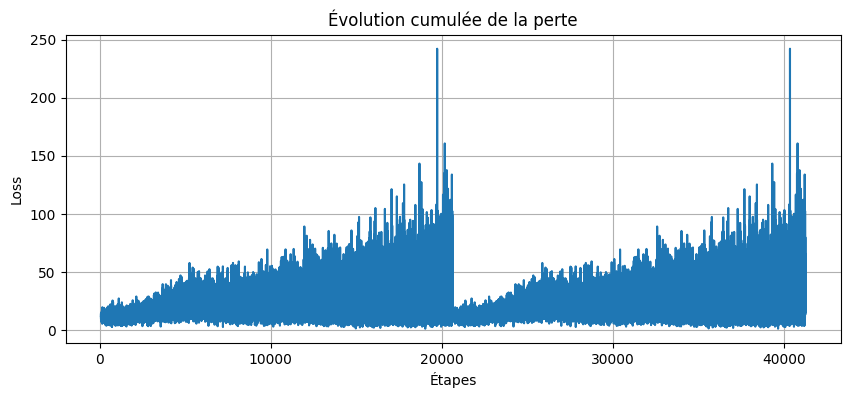

In [17]:
import copy
import torch
import matplotlib.pyplot as plt
import numpy as np

# 1. Sauvegarde du modèle entraîné
model = agent.q_net
torch.save(model.state_dict(), 'model_weights_2.pth')

# 2. Chargement du modèle dans une nouvelle instance
obs_size = np.prod(env.observation_space.shape)  # Exemple : 5x5x7 = 175
n_actions = env.action_space.n
loaded_model = Net(obs_size, 128, 128, n_actions)
loaded_model.load_state_dict(torch.load('model_weights_2.pth'))
loaded_model.eval()

# 3. Gestion robuste des listes de pertes
try:
    loses_old = copy.deepcopy(loses2)
except NameError:
    loses_old = []

try:
    loses1 = copy.deepcopy(losses)
except NameError:
    loses1 = []

# Nouvelle session d'entraînement
# (On suppose que 'losses' vient juste d’être mise à jour)
try:
    loses2 = loses1 + losses
except NameError:
    loses2 = loses1

# 4. Affichage de la courbe de perte cumulée
plt.figure(figsize=(10, 4))
plt.plot(loses_old + loses1 + losses)
plt.title("Évolution cumulée de la perte")
plt.xlabel("Étapes")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


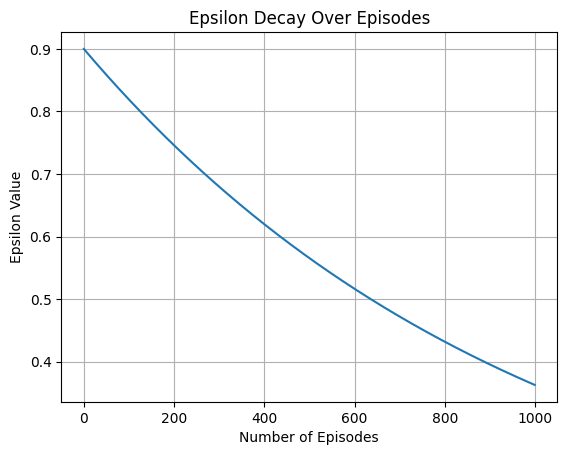

In [18]:
import numpy as np
import matplotlib.pyplot as plt

epsilon_start = 0.9
decrease_epsilon_factor = 1000
epsilon_min = 0.05
n_eps = np.arange(1000)  # Assuming you have 10,000 episodes

epsilon = epsilon_min + (epsilon_start - epsilon_min) * (
                        np.exp(-1. * n_eps / decrease_epsilon_factor))

plt.plot(n_eps, epsilon)
plt.xlabel('Number of Episodes')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay Over Episodes')
plt.grid(True)
plt.show()

In [19]:
agent.epsilon = 0.08
def eval_agent(agent, env, n_sim=5):
    env_copy = deepcopy(env)
    episode_rewards = np.zeros(n_sim)
    for i in range(n_sim):
        state, _ = env_copy.reset()
        reward_sum = 0
        done = False
        print()
        while not done: 
            print(".",end="")
            action = agent.get_best_action(state)
            state, reward, terminated, truncated, _ = env_copy.step(action)
            reward_sum += reward
            done = terminated# or truncated
        episode_rewards[i] = reward_sum
    return episode_rewards

We evaluate the agent's performance and visualize one full episode

In [24]:
rewards = eval_agent(agent, env, 5 )
print("")
print("mean reward after training = ", np.mean(rewards))


.....................
.............
.......
.............
.......
mean reward after training =  7.845836059744032


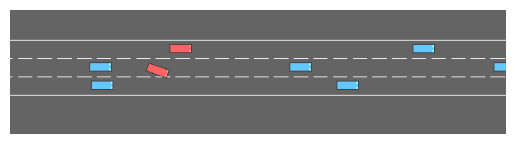

Episode total reward: 13.519022613103076


In [21]:
# Modifier le paramètre via unwrapped
env.unwrapped.config['vehicles_density'] = 1.7

# Fonction de visualisation
def run_one_episode(env, agent, display=True):        
    display_env = deepcopy(env)        
    done = False  
    state, _ = display_env.reset()        
    rewards = 0        

    while not done:  
        action = agent.get_best_action(state)  
        print(f"Action: {action}")
        state, reward, terminated, truncated, _ = display_env.step(action)    
        rewards += reward        
        done = terminated or truncated

        if display:         
            clear_output(wait=True)        
            plt.imshow(display_env.render())        
            plt.axis("off")
            plt.show()        
    
    if display:        
        display_env.close()        
    print(f"Episode total reward: {rewards}")

# Lancer un épisode avec la config modifiée
run_one_episode(env, agent, display=True)


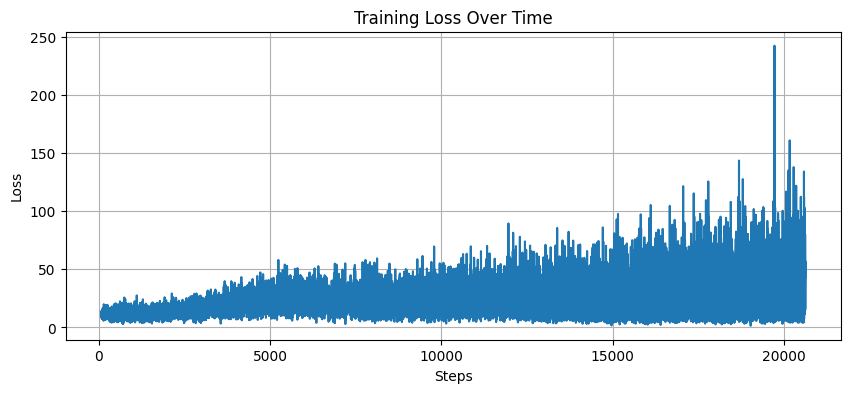

In [22]:
plt.figure(figsize=(10,4))
plt.plot(losses)
plt.title("Training Loss Over Time")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

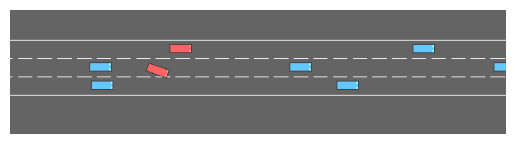

Episode total reward: 13.519022613103076


In [23]:
agent.epsilon = 0.01
run_one_episode(env, agent, display=True)

In [27]:
state, _ = env.reset()  

print("Observation shape:", state.shape)
print("Flattened shape:", torch.tensor(state).flatten().shape)

Observation shape: (7, 8, 8)
Flattened shape: torch.Size([448])
